# check_matched_props
Plot the properties of CosmoDC2 galaxies that have been matched to GHOST galaxies.

In [50]:
import numpy as np
import GCRCatalogs
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy import stats
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u
import pandas as pd
## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 1.3.2 | GCR = 0.9.2


In [51]:
mode = 'SN Ia'
# mode = 'SN II'
# mode = 'SLSN-I'
# mode = 'SN IIP'
# mode = 'SN IIb'
# mode = 'SN IIn'
# mode = 'SN Ib'
# mode = 'SN Ic'
if ' ' in mode:
    modestr = mode.replace(' ','')

In [52]:
plt.rcParams['figure.figsize'] = (9.0, 6.5)
plt.rcParams['font.size'] = 14.0

In [53]:
resampled = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2_pzRedshifts_SFR_RMag_lt_neg15.csv")
cG = resampled['Mag_true_g_sdss_z0']
cR = resampled['Mag_true_r_sdss_z0']
cI = resampled['Mag_true_i_sdss_z0']
cZ = resampled['Mag_true_z_sdss_z0']
c_ellip = resampled['morphology/totalEllipticity']
c_rshift = resampled['PZflowredshift']
c_gr = cG-cR
c_iz = cI-cZ
c_ri = cR-cI

In [61]:
data=pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/cdc2_matched_ghost_{:s}_unq_zwgt_5pct_k10.csv".format(modestr))
dG = data['Mag_true_g_sdss_z0']
dR = data['Mag_true_r_sdss_z0']
dI = data['Mag_true_i_sdss_z0']
dZ = data['Mag_true_z_sdss_z0']
d_ellip = data['totalEllipticity']
d_rshift = data['PZflowredshift']
d_gr = dG-dR
d_ri = dR-dI
d_iz = dI-dZ
nn_dist = data['nn_distance']

In [55]:
# Import GHOST data
file = 'data_files/GHOST_restFrame_condenseLabels_0323.csv'
ghost = pd.read_csv(file)
print(ghost.columns)
print(len(ghost))
# First group by transient class
ghost = ghost[ghost['TransientClass'] == mode]
ghost.reset_index(inplace=True)
print("Number of {:s}: {:d}".format(mode,len(ghost)))
transient_class = ghost['TransientClass']
gG = ghost['gKronMag_SDSS_abs']
gR = ghost['rKronMag_SDSS_abs']
gI = ghost['iKronMag_SDSS_abs']
gZ = ghost['zKronMag_SDSS_abs']
g_rshift = ghost['NED_redshift']
g_rshift2 = ghost['TransientRedshift']
g_ellip  = ghost['r_ellip']
g_gr   = ghost['g-r_SDSS_rest']
g_ri   = ghost['r-i_SDSS_rest']
g_iz   = ghost['i-z_SDSS_rest']

Index(['TransientClass', 'objID', 'raMean', 'decMean', 'NED_redshift',
       'TransientRedshift', 'gKronMag', 'gApMag', 'gPSFMag', 'rKronMag',
       'rApMag', 'rPSFMag', 'iKronMag', 'iApMag', 'iPSFMag', 'zKronMag',
       'zApMag', 'zPSFMag', 'yKronMag', 'yApMag', 'yPSFMag', 'gKronMagErr',
       'gApMagErr', 'gPSFMagErr', 'rKronMagErr', 'rApMagErr', 'rPSFMagErr',
       'iKronMagErr', 'iApMagErr', 'iPSFMagErr', 'zKronMagErr', 'zApMagErr',
       'zPSFMagErr', 'yKronMagErr', 'yApMagErr', 'yPSFMagErr', 'g-r', 'r-i',
       'i-z', 'z-y', 'g-rErr', 'r-iErr', 'i-zErr', 'z-yErr', 'g_ellip',
       'r_ellip', 'i_ellip', 'z_ellip', 'g-r_SDSS_rest', 'r-i_SDSS_rest',
       'i-z_SDSS_rest', 'y_ellip', 'g_elong', 'r_elong', 'i_elong', 'z_elong',
       'y_elong', 'gKronMag_SDSS_abs', 'rKronMag_SDSS_abs',
       'iKronMag_SDSS_abs', 'zKronMag_SDSS_abs'],
      dtype='object')
12136
Number of SN Ia: 8390


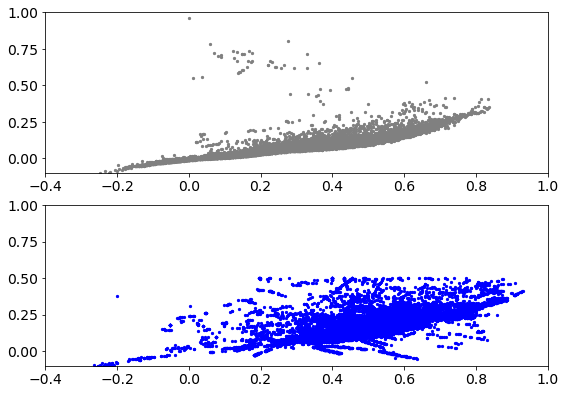

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=1)
idx = np.random.choice(np.arange(len(c_gr)), size=len(d_gr), replace=False)
ax[0].scatter(c_gr[idx], c_iz[idx], s=5, color='grey')
ax[1].scatter(d_gr, d_iz, s=5, color='blue')
for i in range(2):
    ax[i].set_ylim([-.1,1])
    ax[i].set_xlim([-.4,1])

In [63]:
ghost_keys   = [gR, gI, g_gr, g_iz, g_ellip, g_rshift]
cdc2_all     = [cR, cI, c_gr, c_iz, c_ellip, c_rshift]
cdc2_matched = [dR, dI, d_gr, d_iz, d_ellip, d_rshift]

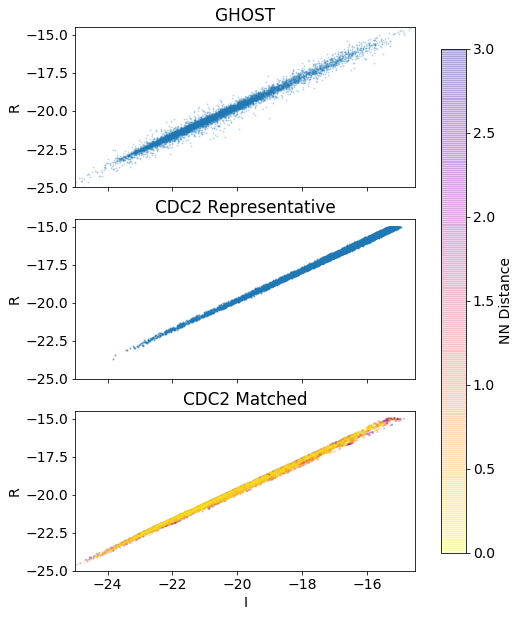

<Figure size 648x468 with 0 Axes>

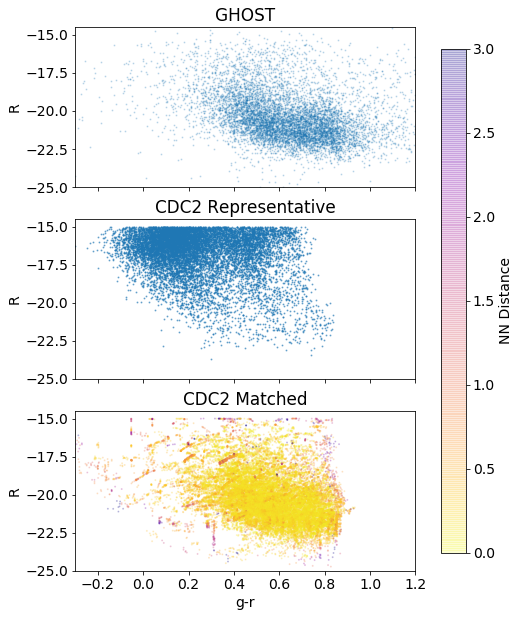

<Figure size 648x468 with 0 Axes>

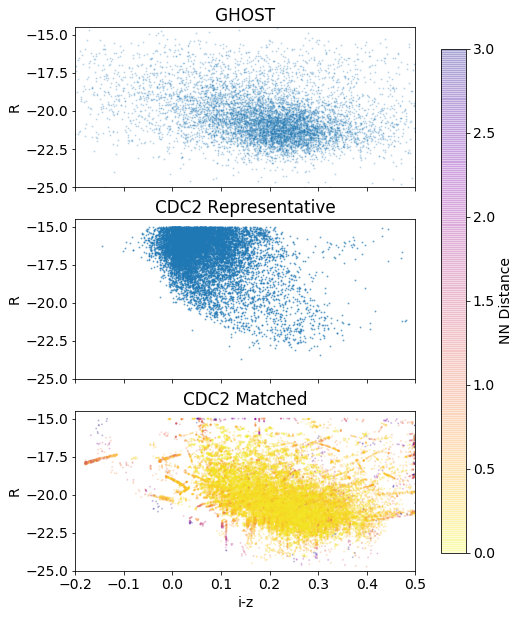

<Figure size 648x468 with 0 Axes>

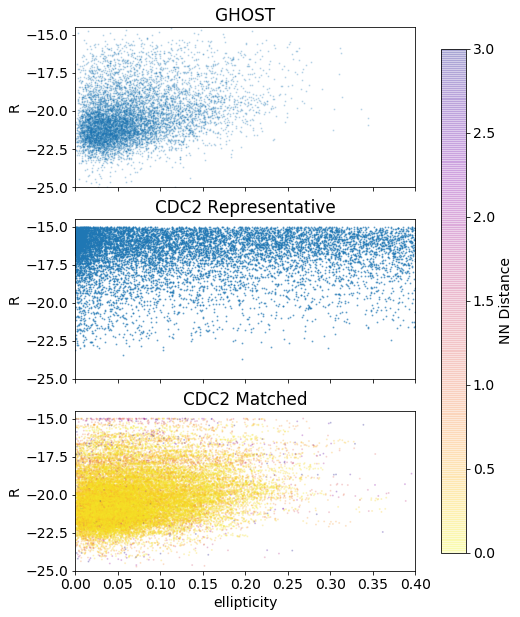

<Figure size 648x468 with 0 Axes>

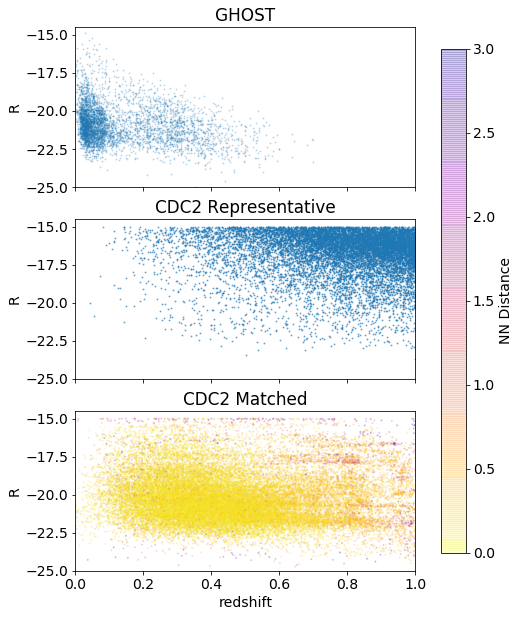

<Figure size 648x468 with 0 Axes>

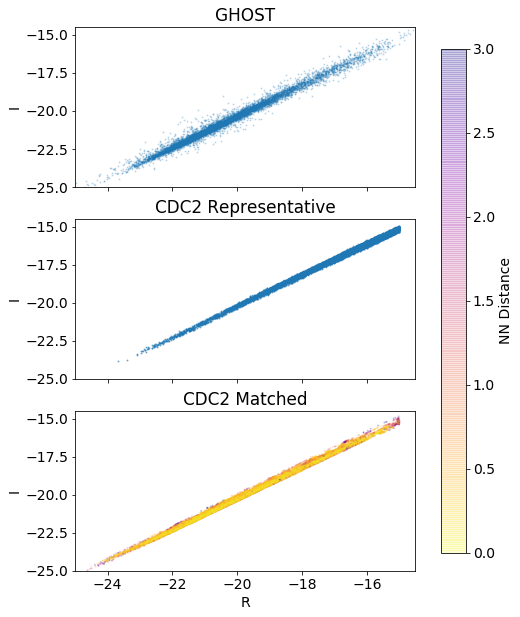

<Figure size 648x468 with 0 Axes>

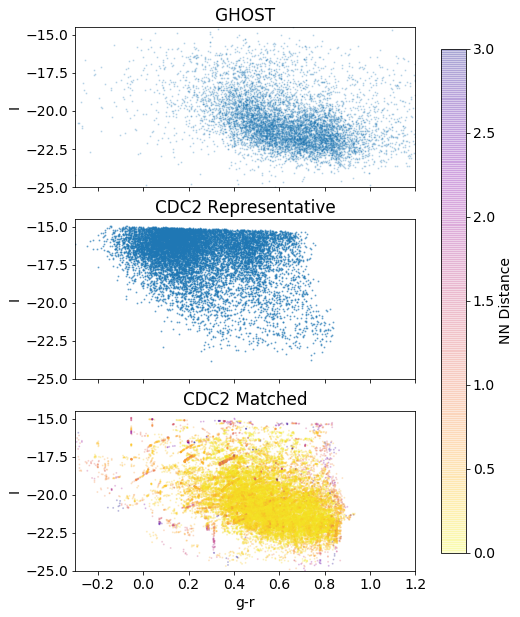

<Figure size 648x468 with 0 Axes>

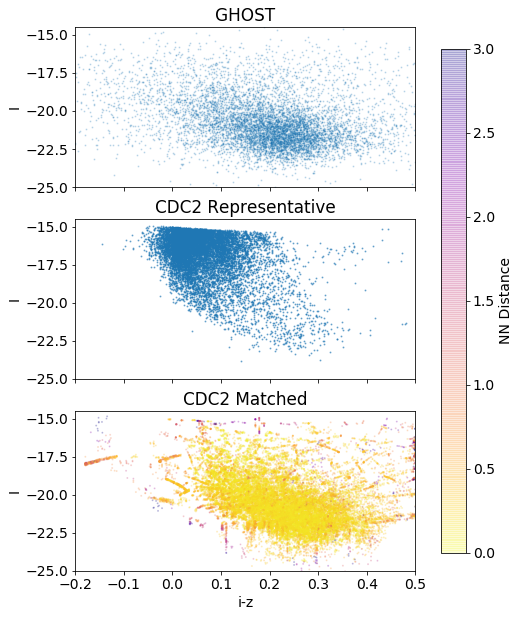

<Figure size 648x468 with 0 Axes>

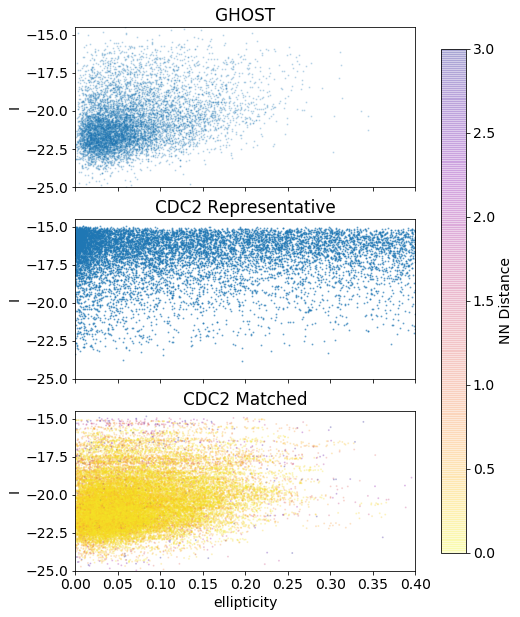

<Figure size 648x468 with 0 Axes>

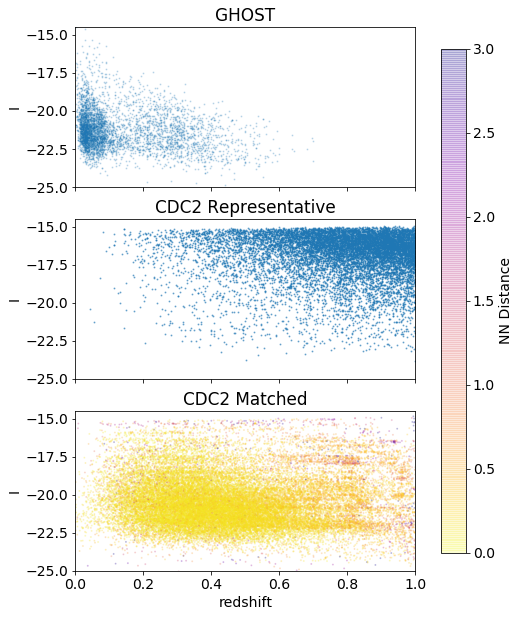

<Figure size 648x468 with 0 Axes>

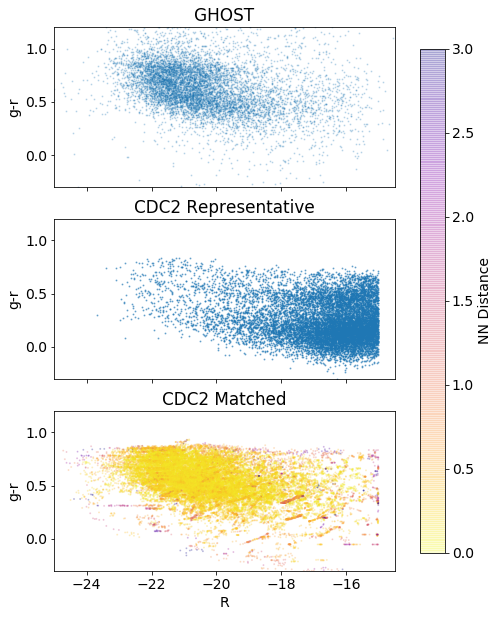

<Figure size 648x468 with 0 Axes>

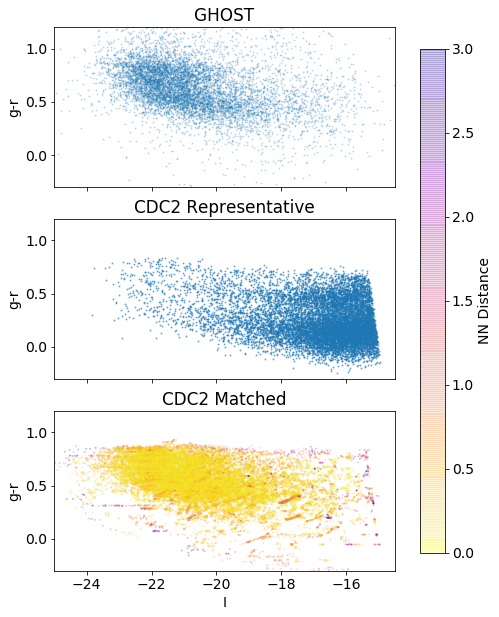

<Figure size 648x468 with 0 Axes>

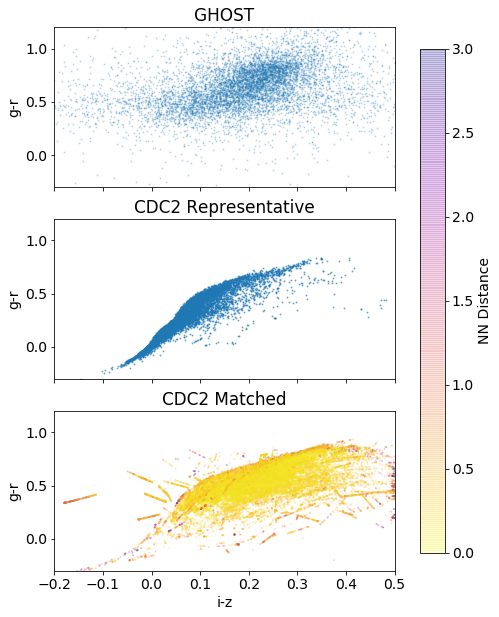

<Figure size 648x468 with 0 Axes>

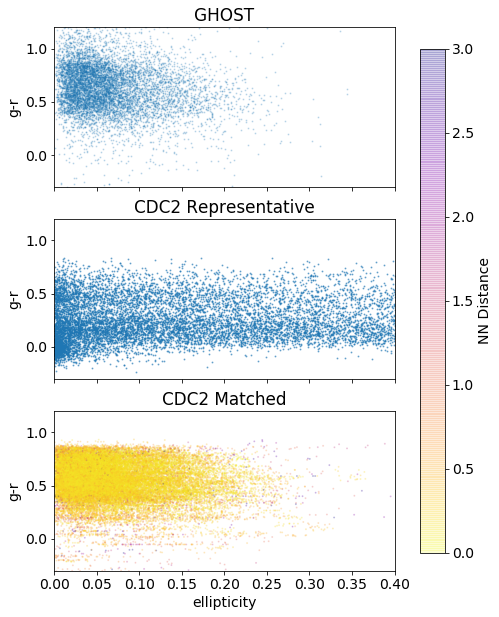

<Figure size 648x468 with 0 Axes>

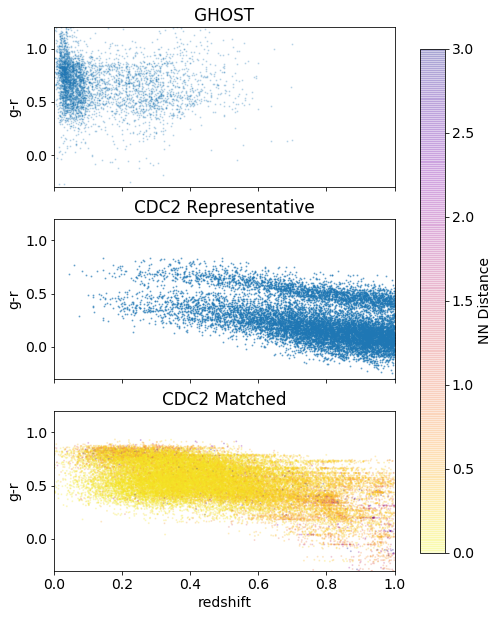

<Figure size 648x468 with 0 Axes>

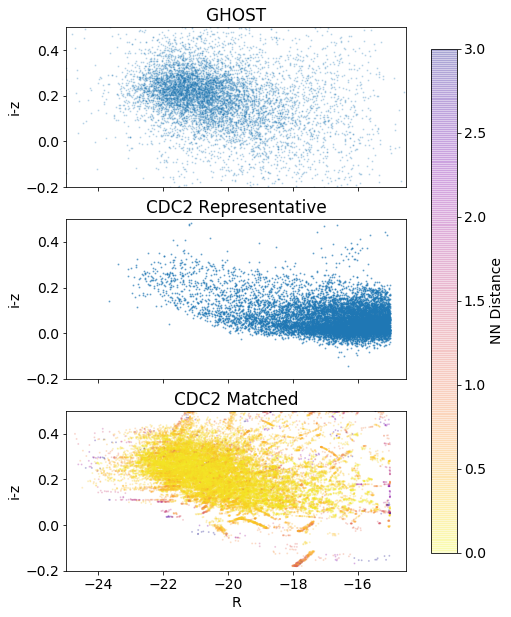

<Figure size 648x468 with 0 Axes>

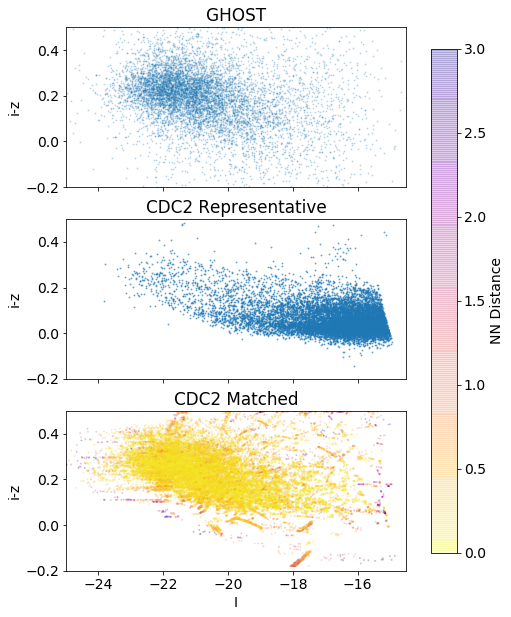

<Figure size 648x468 with 0 Axes>

<Figure size 648x468 with 0 Axes>

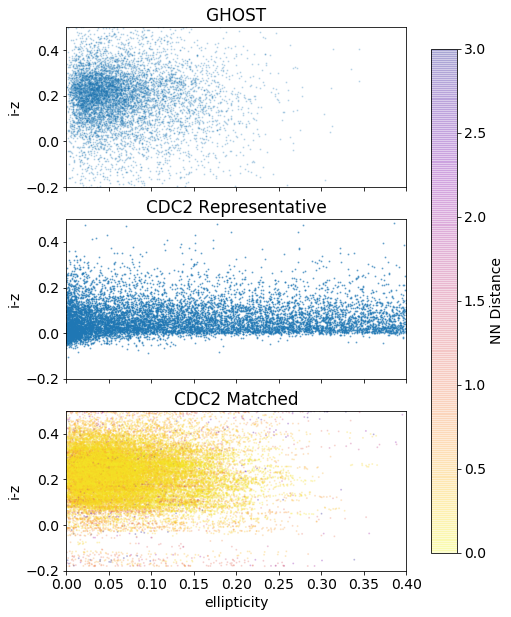

<Figure size 648x468 with 0 Axes>

<Figure size 648x468 with 0 Axes>

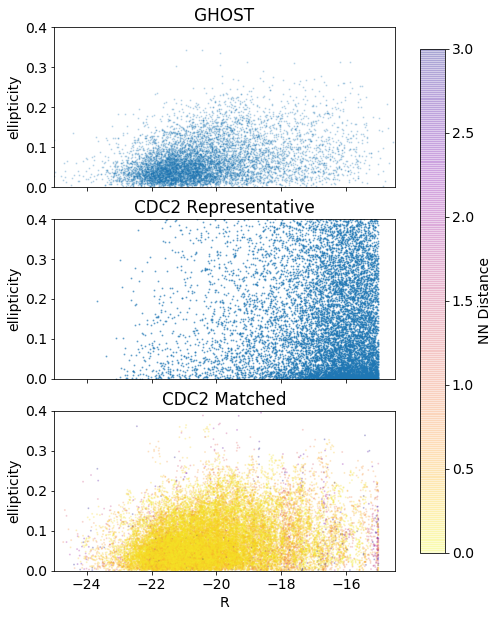

<Figure size 648x468 with 0 Axes>

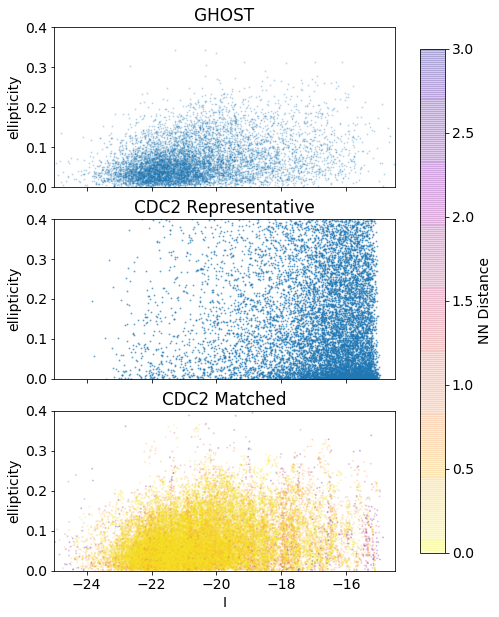

<Figure size 648x468 with 0 Axes>

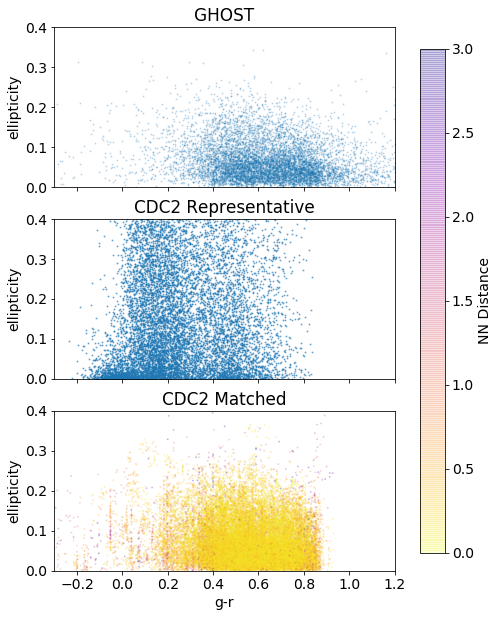

<Figure size 648x468 with 0 Axes>

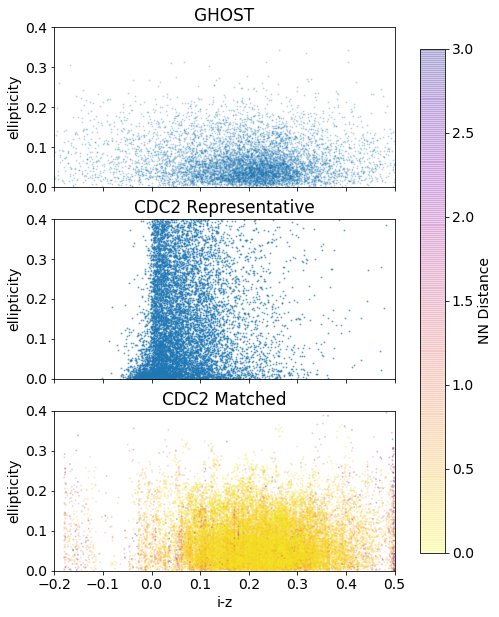

<Figure size 648x468 with 0 Axes>

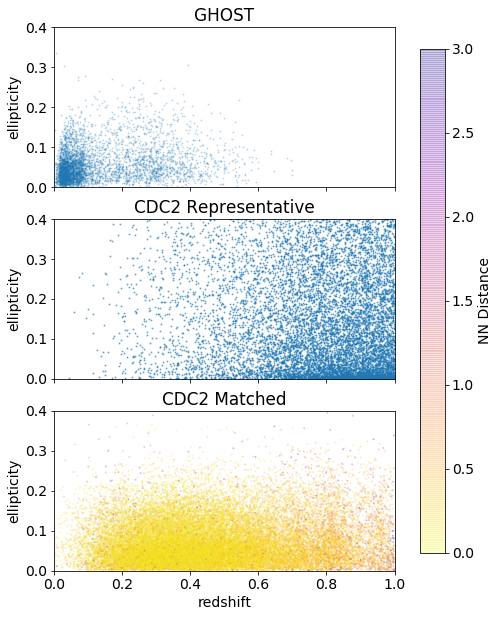

<Figure size 648x468 with 0 Axes>

<Figure size 648x468 with 0 Axes>

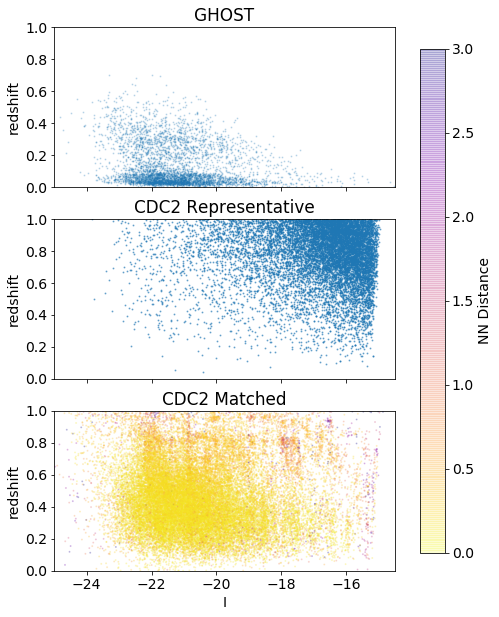

<Figure size 648x468 with 0 Axes>

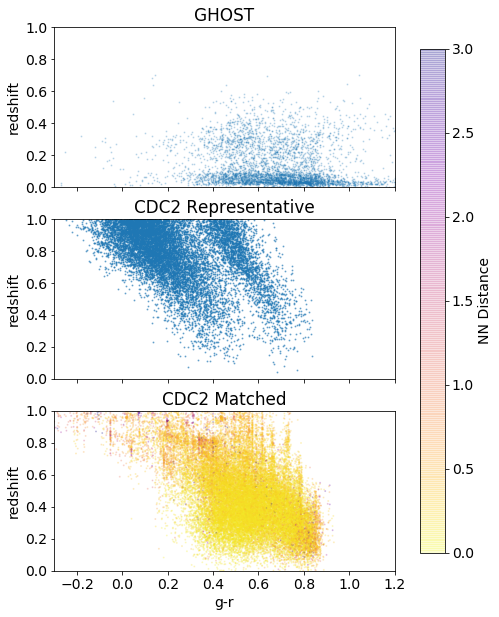

<Figure size 648x468 with 0 Axes>

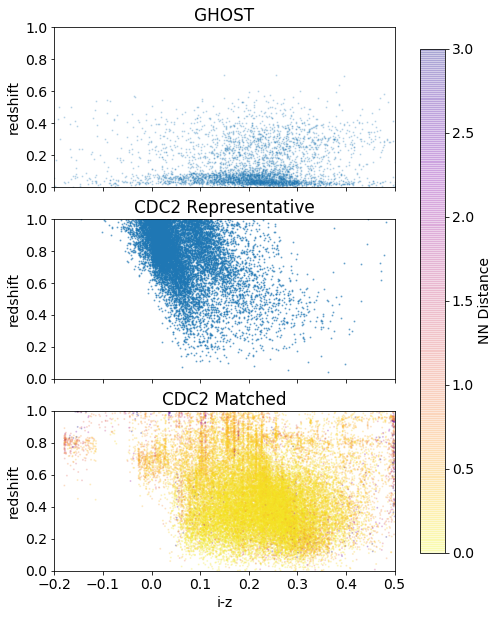

<Figure size 648x468 with 0 Axes>

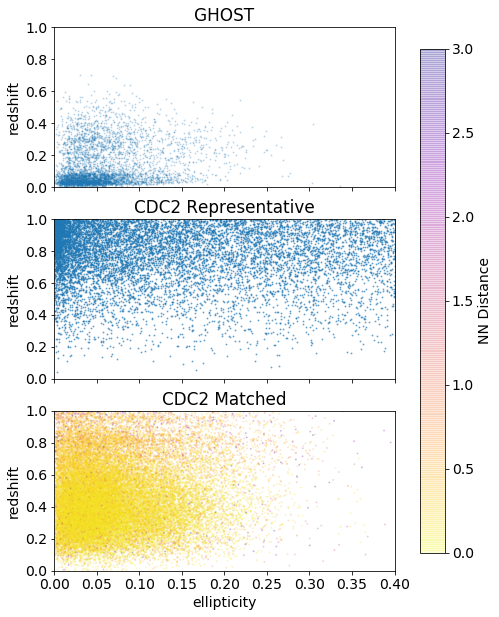

<Figure size 648x468 with 0 Axes>

In [64]:
# check all properties against each other for CosmoDC2
labels=['R', 'I', 'g-r', 'i-z', 'ellipticity', 'redshift']
lims =[[-25,-14.5],[-25,-14.5],[-0.3,1.2],[-0.2,0.5],[0,0.4],[0,1]]
for i in range(6):
    for j in range(6):
        if i!=j:
            fig,ax = plt.subplots(nrows=3,ncols=1,figsize=[7,10],sharex=True)
            im1=ax[0].scatter(ghost_keys[j],ghost_keys[i],alpha=0.2, s=1, vmin=0, vmax=3)
            im2=ax[1].scatter(cdc2_all[j][idx],cdc2_all[i][idx], alpha=0.5, s=1, vmin=0, vmax=3)
            im3=ax[2].scatter(cdc2_matched[j],cdc2_matched[i],c=nn_dist, cmap='plasma_r', alpha=0.2, s=1, vmin=0, vmax=3)
            ax[2].set_xlabel(labels[j])
            for m in range(3):
                ax[m].set_ylabel(labels[i])
            ax[0].set_title("GHOST")
            ax[1].set_title("CDC2 Representative")
            ax[2].set_title("CDC2 Matched")
            fig.subplots_adjust(right=0.8)
            cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
            cbar = fig.colorbar(im3, cax=cbar_ax)
            cbar.set_label("NN Distance")
            for m in range(3):
                ax[m].set_xlim(lims[j])
                ax[m].set_ylim(lims[i])
                ax[0].set_ylim(lims[i])
            plt.show()
#             plt.tight_layout()
#             plt.savefig("plots/ghost_cdc2_k10_lowz_weighting_unq_{:s}_vs_{:s}.png".format(labels[i],labels[j]), bbox_inches='tight')
            plt.clf()
            